Logistic Regression is a supervised learning algorithm. It can model the probability of a specific class or category. It is applied when the outcome is binary, and the data may be linearly separated. That means problems involving binary classification are solved using Logistic Regression. 

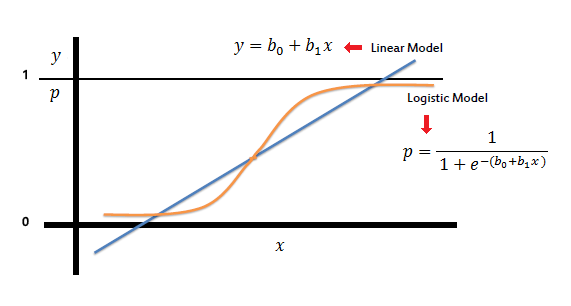 

Referances

1. https://www.saedsayad.com/logistic_regression.htm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
dir_path = "/content/gdrive/MyDrive/Colab Notebooks/Final_Project_Yashkumar_1138765/"

In [ ]:
# Loading dataset
data1=pd.read_excel(dir_path + "Data/Eng_Dataset.xlsx")
data2=pd.read_excel(dir_path + "Data/Guj_Dataset.xlsx")
data3=pd.read_excel(dir_path + "Data/Hin_Dataset.xlsx")
data4=pd.read_excel(dir_path + "Data/Mar_Dataset.xlsx")
data5=pd.read_excel(dir_path + "Data/Pun_Dataset.xlsx")

In [ ]:
# Concatanating the files data
data = pd.concat([
    data1[['comment_text', 'toxic']],
    data2[['comment_text', 'toxic']],
    data3[['comment_text', 'toxic']],
    data4[['comment_text', 'toxic']],
    data5[['comment_text', 'toxic']]
])

In [ ]:
data.size # (14995 rows * 2 columns)

29990

In [ ]:
data.shape

(14995, 2)

In [ ]:
data['toxic'].value_counts()

1.0    7500
0.0    7495
Name: toxic, dtype: int64

In [ ]:
data = data.astype({"toxic": int, "comment_text": str})

In [ ]:
data.dtypes

comment_text    object
toxic            int64
dtype: object

In [ ]:
data.head()

,comment_text,toxic
0,Explanation Why the edits made under my userna...,0
1,D aww He matches this background colour I m se...,0
2,Hey man I m really not trying to edit war It s...,0
3,More I can t make any real suggestions on imp...,0
4,You sir are my hero Any chance you remember wh...,0


In [ ]:
data.isnull().sum()

comment_text    0
toxic           0
dtype: int64

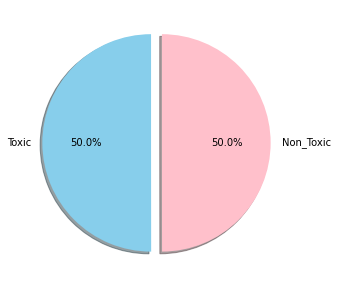

In [ ]:
# Plotting the data distibution 
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=data[data['toxic']==1]
neg=data[data['toxic']==0]
ck=[pos['toxic'].count(),neg['toxic'].count()]
legpie=plt.pie(ck,labels=["Toxic","Non_Toxic"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 90,
                 explode=(0, 0.1))

In [ ]:
# add new column to calculate the length of each comment
data['length'] = data['comment_text'].str.len()

# compute the summary statistics
data[["length"]].describe().T

,count,mean,std,min,25%,50%,75%,max
length,14995.0,346.164922,640.867558,2.0,72.0,158.0,356.0,15684.0


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
def tokenizer(text):
        return text.split()

In [ ]:
# tokenizing data
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer,use_idf=True,norm='l2',smooth_idf=True)
y=data.toxic.values
x=tfidf.fit_transform(data.comment_text)

In [ ]:
print(x[0])

  (0, 436)	0.13629397545473285
  (0, 487)	0.1516648558771504
  (0, 358)	0.14644587411427934
  (0, 643)	0.14397108902004568
  (0, 15161)	0.10990839624576292
  (0, 16929)	0.18820233374566683
  (0, 14358)	0.10178687548523987
  (0, 17590)	0.12276810984321544
  (0, 15502)	0.09225787054040967
  (0, 18390)	0.09929527054910753
  (0, 12499)	0.09429391208470374
  (0, 18481)	0.15003262861094374
  (0, 16762)	0.12983646313734015
  (0, 11339)	0.09975649758621642
  (0, 15868)	0.11737051127704197
  (0, 1012)	0.1131067208141196
  (0, 2877)	0.16757381381483724
  (0, 2577)	0.2023369596283723
  (0, 8267)	0.1767906739678217
  (0, 5339)	0.14780584159965618
  (0, 9008)	0.09384017867601845
  (0, 19433)	0.18820233374566683
  (0, 3819)	0.13350233622132449
  (0, 8506)	0.12471167070897449
  (0, 3234)	0.19406873352526693
  (0, 17779)	0.10331507755081937
  (0, 15297)	0.07990596673735265
  (0, 10084)	0.2023369596283723
  (0, 13886)	0.09610535416751705
  (0, 19277)	0.2023369596283723
  (0, 18358)	0.16623329034203943


In [ ]:
# total number of features
print(len(tfidf.get_feature_names_out()))

83238


In [ ]:
# split the data in train and test set
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.1,shuffle=True)

In [ ]:
# training model
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=0,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Model Train and Test Accuracy
print("Train Accuracy: %.2f" % clf.score(X_train, y_train))
print("Test Accuracy: %.2f" % accuracy_score(y_test, y_pred))

Train Accuracy: 1.00
Test Accuracy: 0.88


In [ ]:
# Calculating Accuracy Score and Classification report
print("Test Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred) * 100))
print(classification_report(y_test, y_pred))

# Confusion matrix
cf_matrix=confusion_matrix(y_test, y_pred)
pd.DataFrame(cf_matrix)

Test Accuracy: 88.07%
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       754
           1       0.90      0.85      0.88       746

    accuracy                           0.88      1500
   macro avg       0.88      0.88      0.88      1500
weighted avg       0.88      0.88      0.88      1500



,0,1
0,687,67
1,112,634


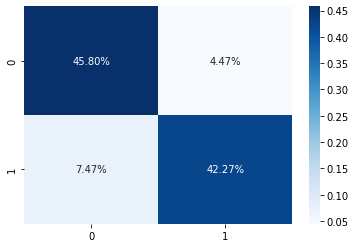

In [ ]:
# Plot Confusion matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
# save model in pkl file
joblib.dump(clf, dir_path + 'model/Logistic_Regression.pkl')

['/content/gdrive/MyDrive/Colab Notebooks/Final_Project_Yashkumar_1138765/model/Logistic_Regression.pkl']

In [ ]:
# load model
model = joblib.load(dir_path + 'model/Logistic_Regression.pkl')

text= [" डी aww वह इस पृष्ठभूमि रंग से मेल खाता है मैं प्रतीत होता है कि धन्यवाद टॉक 21 51 जनवरी 11 2016 यूटीसी के साथ फंस गया है",
       "हाय मला वाटतं की तुम्ही सर्वात दुःखी व्यक्ती असाल ज्याच्याशी मी कधीही बोललो आहे एव्हर lgrainger199810",
       "ਤੁਹਾਨੂੰ ਇੱਕ ਬੇਵਕੂਫ ਹੋਣ ਲਈ ਟਰਾਊਟ ਕੀਤਾ ਗਿਆ ਹੈ",
       "You sir are my hero Any chance you remember what page that s on ",
       " મને લાગે છે કે હું ફ્રેડ ફેલ્પ્સની પાછળ ઉભો છું તે ક્યારેય તેની પાછળ કે સામે ઊભો રહેશે નહીં કારણ કે તે છે"]

# Tokenize the text       
tok = tfidf.transform(text)

# predict using the model 
prediction = model.predict(tok)

# Results of predications
for i in prediction:
  if(prediction[i] == 1):
    print("Toxic")
  else:
    print("Non-Toxic")

Non-Toxic
Toxic
Toxic
Non-Toxic
Toxic
